## Comparing distributions

In [40]:
import numpy as np
import matplotlib.pyplot as plt

In [45]:
#1 get the data

gan_samples = np.load('./../Experiments_Data/generated_data.npy')
training_samples = np.load('./../Experiments_Data/training_data.npy')
folk_rnn_samples = np.load('./../Experiments_Data/folkRnn_data.npy', allow_pickle=True)
#magenta_samples =

size = min(gan_samples.shape[0], training_samples.shape[0], folk_rnn_samples.shape[0])

training_samples_selected = np.random.permutation(training_samples)[:size]
gan_samples_selected = np.random.permutation(gan_samples)[:size]

## 1. t-SNE comparision

In [52]:
from sklearn.manifold import TSNE

folk_tsne = TSNE(n_components=2, perplexity=50).fit_transform(folk_rnn_samples)
data_tsne = TSNE(n_components=2, perplexity=50).fit_transform(training_samples)
gen_tsne = TSNE(n_components=2, perplexity=50).fit_transform(gan_samples)

#gen_tsne = TSNE(n_components=2).fit_transform(gen_samples)

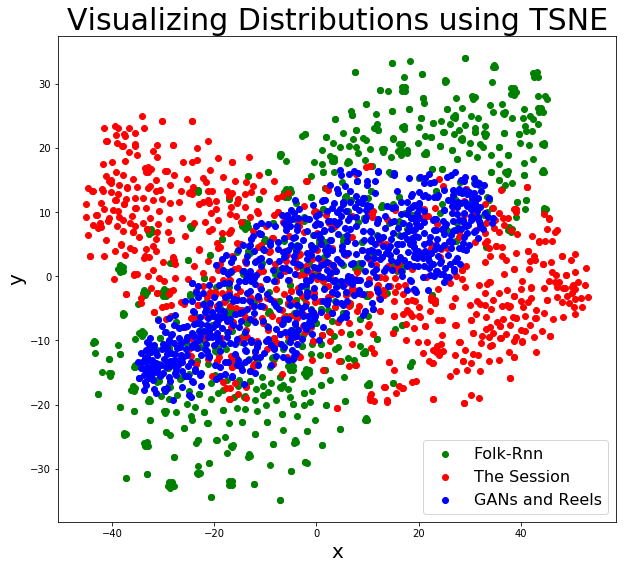

ValueError: Format 'jpg' is not supported (supported formats: eps, pdf, pgf, png, ps, raw, rgba, svg, svgz)

In [53]:
FIG_SIZE = (10, 10)
TITLE_FONT_SIZE = 30
FONT_SIZE = 20
LEGEND_FONT_SIZE = 16
title = 'Visualizing Distributions using TSNE'
xlabel, ylabel = 'x', 'y'


# ------------------- Format ----------------------------

fig = plt.figure(figsize=FIG_SIZE) # Creates a new figure

ax = fig.add_subplot(111) # add a subplot to the new figure, 111 means "1x1 grid, first subplot"
fig.subplots_adjust(top=0.80) # adjust the placing of subplot, adjust top, bottom, left and right spacing  
ax.set_title(title, fontsize= TITLE_FONT_SIZE) # title of plot

ax.set_xlabel(xlabel,fontsize = FONT_SIZE) #xlabel
ax.set_ylabel(ylabel, fontsize = FONT_SIZE)#ylabel

plt.scatter(folk_tsne[:,0], folk_tsne[:,1], c='green', label='Folk-Rnn')
plt.scatter(data_tsne[:,0], data_tsne[:,1], c='red', label='The Session')
plt.scatter(gen_tsne[:,0], gen_tsne[:,1], c='blue', label='GANs and Reels')

ax.legend(fontsize = LEGEND_FONT_SIZE)
plt.show()

fig.savefig('test.jpg')

(26,)